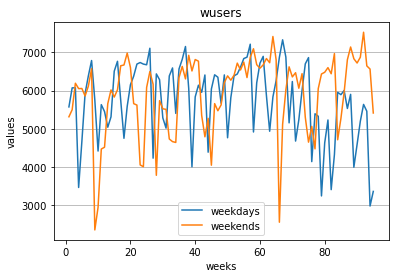

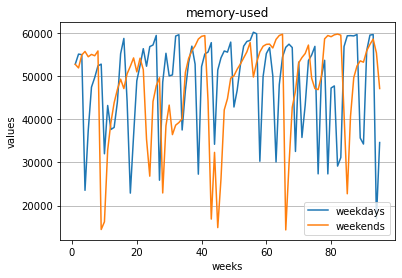

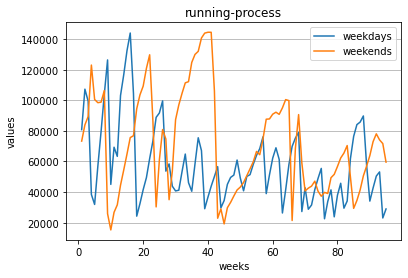

In [78]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
file = '../Data/weekends_holidays - weekends_holidays.csv'
df = pd.read_csv(file)
lis = []
for a,b in df.iterrows():
    date = b[0].split('-')
    months = {'01':'Jan','02':'Feb','03':'Mar','04':'Apr','05':'May','06':'Jun','07':'Jul','08':'Aug','09':'Sep','10':'Oct','11':'Nov','12':'Dec'}
    date = months[date[1]]+date[0]+'_'+date[2]
    lis.append(date)

csv_path = '../SMC-Data_Challenge/csv_files/'
csvs = ['Jan2020','Feb2020','Mar2020','Apr2020','May2020','Jun2020',
        'Jul2020','Aug2020','Sep2020','Oct2020','Nov2020','Dec2020',
        'Jan2021','Feb2021','Mar2021','Apr2021','May2021','Jun2021',
        'Jul2021','Aug2021','Sep2021','Oct2021','Nov2021','Dec2021']

def finding_correlation(arg):
    wu = []
    weku = []
    for i in csvs:
        df  = pd.read_csv(csv_path+i+'.csv',usecols=['date-hour','login-node','wusers','memory-used','running-process'])
        new_df = df.sort_values(by=['date-hour','login-node'])
    
        month = new_df.iloc[-1][0][0:3]
        year = new_df.iloc[-1][0][5:10]
        end = int(new_df.iloc[-1][0][3:5])
        
        
        for j in range(1,end):
            if j <= 9:
                date = month+'0'+ str(j) + year
            else:
                date = month + str(j) + year
        
            abc = new_df[new_df['date-hour'].str.contains(date)]
        
            if date in lis and abc[arg].sum() != 0:
                # if the sum is 0 that means the column of that date is not present in that dataframe.
                # missing files.
                weku.append(abc[arg].sum())
            if date not in lis and abc[arg].sum() != 0:
                wu.append(abc[arg].sum())

    weekday= []
    weekend = []
    counter = 0
    while len(wu[counter*5:]) >= 5 and len(weku[counter*2:]) >=2:
            weekday.append(round(sum(wu[counter*5:counter*5 + 5])/5,2))
            weekend.append(round(sum(wu[counter*2:counter*2 + 2])/2,2))
            counter +=1

    x_values = np.array([ i for i in range(1,len(weekday)+1)])
    w_values = np.array(weekday)
    we_values = np.array(weekend)
    
   
    plt.plot(x_values,w_values,label='weekdays')
    plt.title(arg)
    plt.xlabel('weeks')
    plt.ylabel('values')
    plt.grid(axis='y')
    plt.plot(x_values,we_values,label='weekends')
    plt.legend()
    
    plt.show()

relation = ['wusers','memory-used','running-process']

for i in relation:
    finding_correlation(i)